In [72]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import importCells
import SpacialOperations as sops
from shapely.geometry import Polygon
import os


In [73]:
# Constants
legs_input_path = 'Paris/output_legs.csv' # MATSim output legs csv file
studyarea_input_path = 'Paris/shp/cps.shp' # shapefile .shp for the DRT study area
popArea_input_path = 'Paris/shp/parisPopArea.shp'
gtfs_input_dir = 'Paris/gtfs/' # path to where gtfs.zip is stored

# EPSG code !!ONLY NUMBER!! EPSG:3035 --> 3035
crs_import = 2154 # crs of the raw imported data
crs_working = 2154 # crs used for the processing (can be same as crs_import)

# Toggle for preprocessing steps
# GTFS preprocessing to get hexagonal grid
#      --> needed once, can be skipped if GTFScells.csv file exists
toggle_GTFSprep = False
GTFScells_path = 'Paris/output/GTFScells.csv'

# Simulation & analysis start and end time
# Interpolation will only be done in this time window
start_time = '08:00:00'
end_time = '12:00:00'
# Length of each analysis interval
deltaT = 1 # in hours (h), default 1h

In [74]:
df = pd.read_csv('/Users/Severin/BaseFiles/legs2gtfs/Paris/output/trips.csv', sep=';', header=0)

In [75]:
gs = gpd.GeoSeries.from_wkt(df['origin'],crs=2154)
gdf = gpd.GeoDataFrame(df, geometry=gs, crs=2154)

In [76]:
gdf = gdf[gdf['Hub']=='Hub_7']

In [77]:
c = gpd.GeoSeries([gdf.unary_union.convex_hull.buffer(250)])

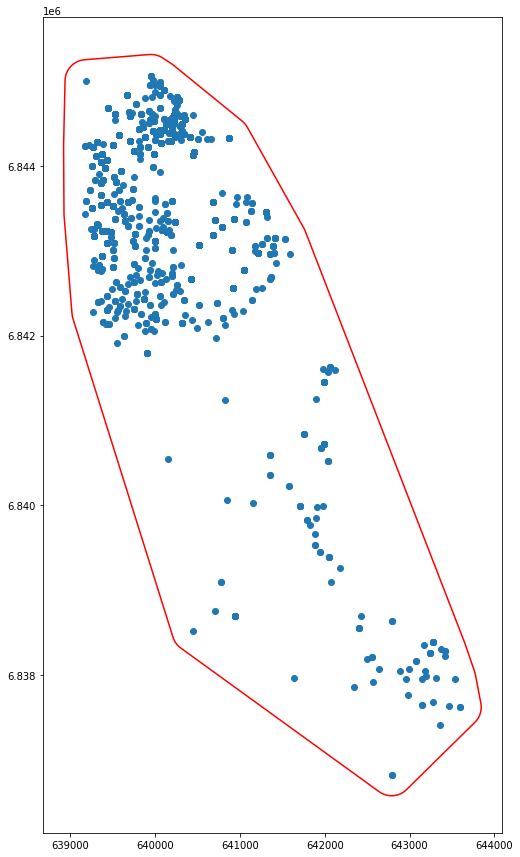

In [78]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax = ax)
c.boundary.plot(color = 'r', ax = ax)
plt.show()

In [79]:
polygon = gdf.unary_union.convex_hull.buffer(250)
cdf = importCells.run(GTFScells_path, crs_working)
cdf = sops.removeExcessGrid(cdf, studyarea_input_path, crs_working, popArea_input_path, False)

In [80]:
cdf_f = cdf.copy()
cdf_f['TripCatchement'] = cdf_f['geometry'].overlaps(polygon) | cdf_f['geometry'].within(polygon)
cdf_f = cdf_f[cdf_f['TripCatchement'] == True]

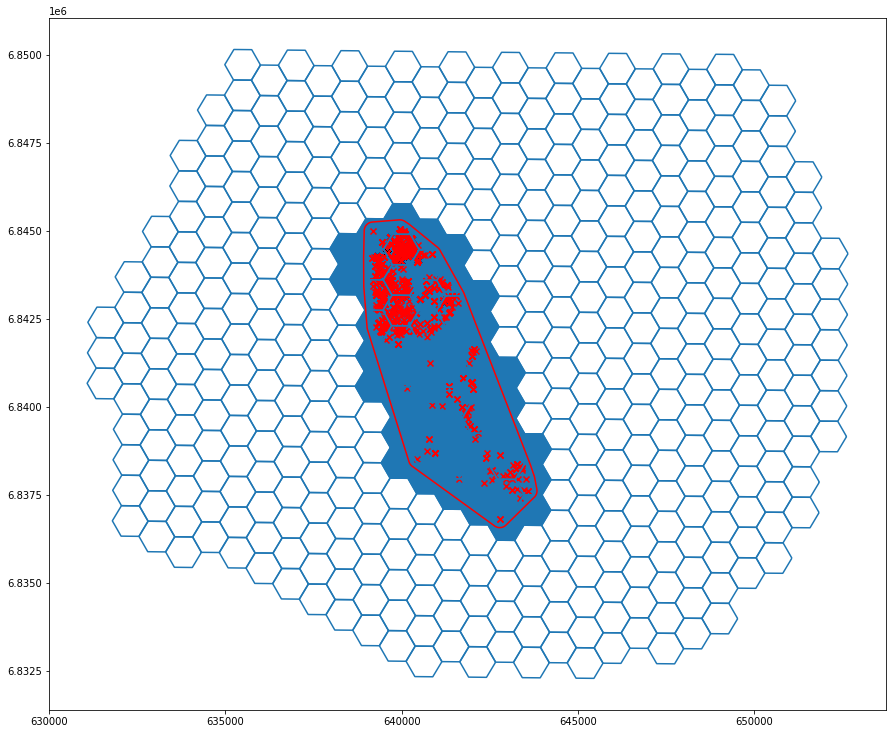

In [83]:
fig, ax = plt.subplots(figsize=(15, 15))
cdf.boundary.plot(ax = ax)
cdf_f.plot(ax = ax)
gdf.plot(ax = ax, color = 'r', marker = 'x')
c.boundary.plot(color = 'r', ax = ax)
plt.show()